# belosgraficos instagram.com/belosgraficos/

#### Notebook para a criação do gráfico de incidentes de segurança da informação reportados ao CERT em 2019

### Comentários estão em português - Comments are in Portuguese

## Notebook criado utilizando o Kaggle
#### Dados: https://www.kaggle.com/rodrigoriboldi/incidentes-de-segurana-da-informao-no-brasil

Importando as bibliotecas necessarias para a execução do código

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Lendo o arquivos dados

In [26]:
# Lendo o arquivo CSV - Atenção para o caminho do arquivo
file_path = '../input/incidentes-de-segurana-da-informao-no-brasil/cert_2010-2019.csv'
dataset = pd.read_csv(file_path, 
                      sep = ";")

# Exibe o cabeçalho no console
display(dataset.head())

# Exibe a informação dos dados no console
dataset.info()

,Ano,Mes,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
0,2019,Janeiro,62481,7796,4191,19,2594,46038,1744,99
1,2019,Fevereiro,70069,7707,2192,27,4179,54401,1459,104
2,2019,Março,85409,4476,29309,19,2006,47966,1521,112
3,2019,Abril,59900,7624,2718,37,1555,45774,2119,73
4,2019,Maio,52129,6555,15773,74,1425,25521,2633,148


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ano      120 non-null    int64 
 1   Mes      120 non-null    object
 2   Total    120 non-null    int64 
 3   Worm     120 non-null    int64 
 4   DOS      120 non-null    int64 
 5   Invasao  120 non-null    int64 
 6   Web      120 non-null    int64 
 7   Scan     120 non-null    int64 
 8   Fraude   120 non-null    int64 
 9   Outros   120 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 9.5+ KB


Preparando os dados para a criação do gráfico

In [27]:
# Selecionando apenas dados do ano de 2019
incidentes_2019 = dataset.loc[dataset.Ano == 2019]

# Removendo a coluna com o total de incidentes
incidentes_2019 = incidentes_2019.drop(['Total'], axis = 1)

# Verificando o dataset
incidentes_2019.head()

,Ano,Mes,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
0,2019,Janeiro,7796,4191,19,2594,46038,1744,99
1,2019,Fevereiro,7707,2192,27,4179,54401,1459,104
2,2019,Março,4476,29309,19,2006,47966,1521,112
3,2019,Abril,7624,2718,37,1555,45774,2119,73
4,2019,Maio,6555,15773,74,1425,25521,2633,148


In [28]:
# Para trabalharmos de forma mais facil com esse dataset, precisamos "derreter" as variaveis dos tipos de ameaças em uma única coluna
incidentes_2019_melted = pd.melt(incidentes_2019, 
                                 id_vars = ['Ano', 'Mes'],
                                 value_vars = ['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros'],
                                 var_name = 'Ameaças',
                                 value_name = 'Incidentes')
# Verificando o dataset
incidentes_2019_melted

,Ano,Mes,Ameaças,Incidentes
0,2019,Janeiro,Worm,7796
1,2019,Fevereiro,Worm,7707
2,2019,Março,Worm,4476
3,2019,Abril,Worm,7624
4,2019,Maio,Worm,6555
...,...,...,...,...
79,2019,Agosto,Outros,160
80,2019,Setembro,Outros,156
81,2019,Outubro,Outros,96
82,2019,Novembro,Outros,52


#### Criando o gráfico

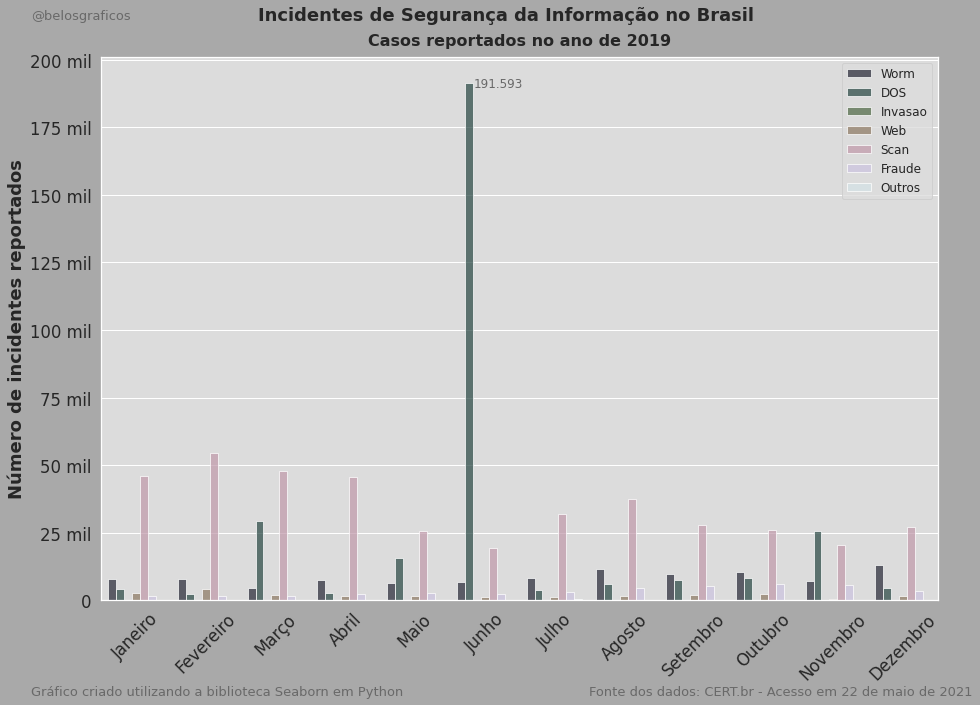

In [29]:
# Definindo temas
sns.set_theme(context = "notebook", 
              font_scale = 1.5,
              rc={'figure.facecolor':'darkgray', 'axes.facecolor':'gainsboro'})

# Criando figura
plt.figure(figsize=(15, 10))

# Plotando os dados com um gráfico de barras
fig = sns.barplot(data=incidentes_2019_melted,
                  x='Mes',
                  y = 'Incidentes',
                  ci = False,
                  hue = 'Ameaças',
                  hue_order = ['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros'],
                  palette = 'cubehelix',
                  saturation = 0.5,
                  alpha = 0.7)

# Tamanho da legenda
plt.legend(fontsize  = 12)

# Configurações do eixo X
plt.xlabel("")
plt.xticks(rotation=45)

# Configurações do eixo Y
plt.yticks(ticks = range(0,225000, 25000),
           labels = ['0', '25 mil', '50 mil', '75 mil', '100 mil', '125 mil', '150 mil', '175 mil', '200 mil'])
plt.ylabel("Número de incidentes reportados", weight='semibold')

# Configurações do título e subtítulo
plt.suptitle("Incidentes de Segurança da Informação no Brasil", y=0.95, fontsize=18, weight='bold', horizontalalignment='center')
plt.title("Casos reportados no ano de 2019", y=1.01, fontsize=16, weight='semibold', horizontalalignment='center')


# Textos auxiliares no gráfico
plt.text(12, -35000, "Fonte dos dados: CERT.br - Acesso em 22 de maio de 2021", 
         horizontalalignment='right',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-1.5, -35000, "Gráfico criado utilizando a biblioteca Seaborn em Python", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-1.5, 215000, "@belosgraficos", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(5.2, 190000, "191.593", 
         horizontalalignment='center',
         va = 'baseline',
         size=12, color='dimgray')

# Salva a figura
plt.savefig("incidentes_2019_seaborn.png")

# Mostra o gráfico
plt.show()

Removendo dados de ataques DOS para melhor visualizar os demais dados

In [ ]:
# Removendo a coluna contendo os ataues de DOS
incidentes_2019_nodos = incidentes_2019.drop(['DOS'], axis = 1)

# Para trabalharmos de forma mais facil com esse dataset, precisamos "derreter" as variaveis dos tipos de ameaças em uma única coluna
incidentes_2019_nodos_melted = pd.melt(incidentes_2019, 
                                       id_vars = ['Ano', 'Mes'],
                                       value_vars = ['Worm', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros'],
                                       var_name = 'Ameaças',
                                       value_name = 'Incidentes')

# Verificando o dataset
incidentes_2019_nodos_melted.head()

Criando o gráfico

In [ ]:
# Definindo temas
sns.set_theme(context = "notebook", 
              font_scale = 1.5,
              rc={'figure.facecolor':'darkgray', 'axes.facecolor':'gainsboro'})

# Criando figura
plt.figure(figsize=(15, 10))

# Plotando os dados com um gráfico de barras
fig = sns.barplot(data=incidentes_2019_nodos_melted,
                  x='Mes',
                  y = 'Incidentes',
                  ci = False,
                  hue = 'Ameaças',
                  hue_order = ['Worm', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros'],
                  palette = 'cubehelix',
                  saturation = 0.5,
                  alpha = 0.7)

# Tamanho da legenda
plt.legend(fontsize  = 12)

# Configurações do eixo X
plt.xlabel("")
plt.xticks(rotation=45)

# Configurações do eixo Y
plt.yticks(ticks = range(0,60000, 10000),
           labels = ['0', '10 mil', '20 mil', '30 mil', '40 mil', '50 mil'])
plt.ylabel("Número de incidentes reportados", weight='semibold')

# Configurações do título e subtítulo
plt.suptitle("Incidentes de Segurança da Informação no Brasil", y=0.95, fontsize=18, weight='bold', horizontalalignment='center')
plt.title("Casos reportados no ano de 2019 - Sem a inclusão de DOS", y=1.01, fontsize=16, weight='semibold', horizontalalignment='center')

# Textos auxiliares no gráfico
plt.text(12, -10000, "Fonte dos dados: CERT.br - Acesso em 22 de maio de 2021", 
         horizontalalignment='right',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-1.5, -10000, "Gráfico criado utilizando a biblioteca Seaborn em Python", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-1.5, 60000, "@belosgraficos", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

# Salva a figura
plt.savefig("incidentes_2019_nodos_seaborn.png")

# Mostra o gráfico
plt.show()

Removendo os dados das ameaças de Worms, e Scans para melhor visualizar as menores ameaças

In [ ]:
# Removendo Worm, DOS e Scans
incidentes_2019_menores = incidentes_2019.drop(['Worm', 'DOS', 'Scan'], axis = 1)

# Para trabalharmos de forma mais facil com esse dataset, precisamos "derreter" as variaveis dos tipos de ameaças em uma única coluna
incidentes_2019_menores_melted = pd.melt(incidentes_2019, 
                                       id_vars = ['Ano', 'Mes'],
                                       value_vars = ['Invasao', 'Web', 'Fraude', 'Outros'],
                                       var_name = 'Ameaças',
                                       value_name = 'Incidentes')

# Verificando o dataset
incidentes_2019_menores_melted.head()

Criando o gráfico

In [ ]:
# Definindo temas
sns.set_theme(context = "notebook", 
              font_scale = 1.5,
              rc={'figure.facecolor':'darkgray', 'axes.facecolor':'gainsboro'})

# Criando figura
plt.figure(figsize=(15, 10))

# Plotando os dados com um gráfico de barras
fig = sns.barplot(data=incidentes_2019_menores_melted,
                  x='Mes',
                  y = 'Incidentes',
                  ci = False,
                  hue = 'Ameaças',
                  hue_order = ['Invasao', 'Web', 'Fraude', 'Outros'],
                  palette = 'cubehelix',
                  saturation = 0.5,
                  alpha = 0.7)

# Tamanho da legenda
plt.legend(fontsize  = 12)

# Configurações do eixo X
plt.xlabel("")
plt.xticks(rotation=45)

# Configurações do eixo Y
plt.yticks(ticks = range(0,7000, 1000),
           labels = ['0', '1 mil', '2 mil', '3 mil', '4 mil', '5 mil', '6 mil'])
plt.ylabel("Número de incidentes reportados", weight='semibold')

# Configurações do título e subtítulo
plt.suptitle("Incidentes de Segurança da Informação no Brasil", y=0.95, fontsize=18, weight='bold', horizontalalignment='center')
plt.title("Casos reportados no ano de 2019 - Sem a inclusão de DOS, Worm e Scans", y=1.01, fontsize=16, weight='semibold', horizontalalignment='center')

# Textos auxiliares no gráfico
plt.text(12, -1200, "Fonte dos dados: CERT.br - Acesso em 22 de maio de 2021", 
         horizontalalignment='right',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-1.5, -1200, "Gráfico criado utilizando a biblioteca Seaborn em Python", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-1.5, 6500, "@belosgraficos", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

# Salva a figura
plt.savefig("incidentes_2019_menores_seaborn.png")

# Mostra o gráfico
plt.show()